# K-means

## Selecting K with the elbow method

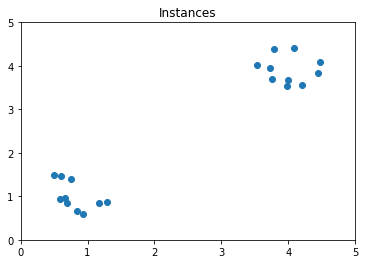

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

c1x = np.random.uniform(0.5,1.5,(1,10))
c1y = np.random.uniform(0.5,1.5,(1,10))
c2x = np.random.uniform(3.5,4.5,(1,10))
c2y = np.random.uniform(3.5,4.5,(1,10))

x=np.hstack((c1x,c2x))
y=np.hstack((c1y,c2y))
plt.scatter(x,y)
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(0,6,1))
plt.title('Instances')
plt.show()


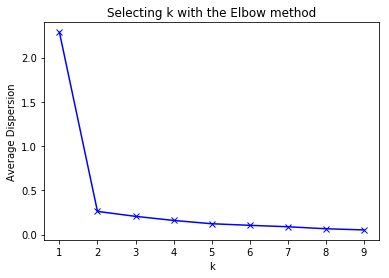

In [7]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

c1x = np.random.uniform(0.5,1.5,(1,10))
c1y = np.random.uniform(0.5,1.5,(1,10))
c2x = np.random.uniform(3.5,4.5,(1,10))
c2y = np.random.uniform(4.5,4.5,(1,10))
x=np.hstack((c1x,c2x))
y=np.hstack((c1y,c2y))
X=np.vstack((x,y)).T

K=range(1, 10)
meanDispersions = []
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K,meanDispersions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow method')
plt.show()

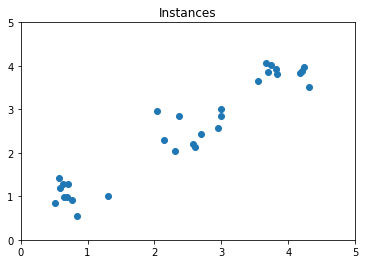

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

c1x = np.random.uniform(0.5,1.5,(1,10))
c1y = np.random.uniform(0.5,1.5,(1,10))
c2x = np.random.uniform(3.5,4.5,(1,10))
c2y = np.random.uniform(3.5,4.5,(1,10))
c3x = np.random.uniform(2.0,3.0,(1,10))
c3y = np.random.uniform(2.0,3.0,(1,10))

x=np.hstack((c1x,c2x,c3x))
y=np.hstack((c1y,c2y,c3y))
plt.scatter(x,y)
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(0,6,1))
plt.title('Instances')
plt.show()

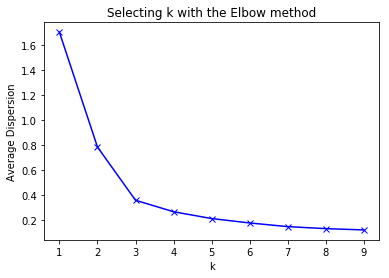

In [11]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

c1x = np.random.uniform(0.5,1.5,(1,10))
c1y = np.random.uniform(0.5,1.5,(1,10))
c2x = np.random.uniform(3.5,4.5,(1,10))
c2y = np.random.uniform(4.5,4.5,(1,10))
c3x = np.random.uniform(2.0,3.0,(1,10))
c3y = np.random.uniform(2.0,3.0,(1,10))
x=np.hstack((c1x,c2x,c3x))
y=np.hstack((c1y,c2y,c3y))
X=np.vstack((x,y)).T

K=range(1, 10)
meanDispersions = []
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K,meanDispersions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow method')
plt.show()

## Evaluating clusters

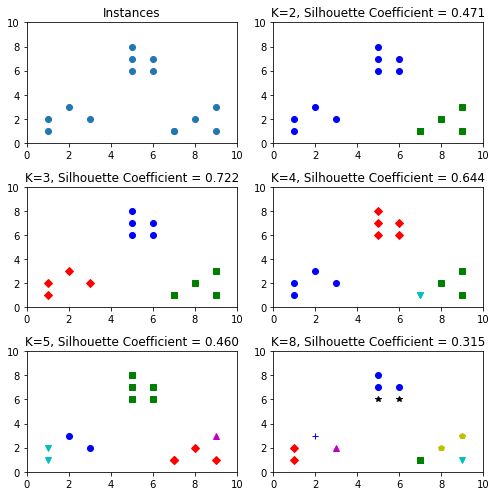

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
plt.subplot(3,2,1)
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)
colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']
tests = [2,3,4,5,8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3,2,subplot_counter)
    kmeans_model= KMeans(n_clusters=t).fit(X)
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.xticks(np.arange(0,12,2))
    plt.yticks(np.arange(0,12,2))
    plt.title('K=%s, Silhouette Coefficient = %.03f' % (t,metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
    plt.tight_layout()
plt.show()

## Image quantization

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# First we read and flatten the image

original_img = np.array(Image.open('C:\\Users\\agudupa\\Pictures\\Saved Pictures\\Train_End.jpg'),dtype=np.float64)/255
original_dimensions = tuple(original_img.shape)
width,height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img,(width*height,depth))

In [27]:
image_array_sample = shuffle(image_flattened,random_state=0)[:1000]
estimator = KMeans(n_clusters=64,random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [28]:
cluster_assignments = estimator.predict(image_flattened)

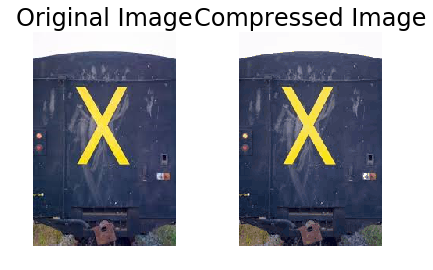

In [29]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx+=1
        
plt.subplot(121)
plt.title('Original Image', fontsize=24)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(122)
plt.title('Compressed Image', fontsize=24)
plt.imshow(compressed_img)
plt.axis('off')
plt.tight_layout()
plt.show()